In [16]:
#!/bin/python
#from __future__ import division
#from __future__ import print_function
import math
import numpy as np
import time

''' Block Davidson, Joshua Goings (2013)

    Block Davidson method for finding the first few
	lowest eigenvalues of a large, diagonally dominant,
    sparse Hermitian matrix (e.g. Hamiltonian)
'''

n = 2400				# Dimension of matrix
tol = 1e-10				# Convergence tolerance
mmax = n//2				# Maximum number of iterations	

''' Create sparse, diagonally dominant matrix A with 
	diagonal containing 1,2,3,...n. The eigenvalues
    should be very close to these values. You can 
    change the sparsity. A smaller number for sparsity
    increases the diagonal dominance. Larger values
    (e.g. sparsity = 1) create a dense matrix
'''

sparsity = 0.0001
A = np.zeros((n,n))
for i in range(0,n):
    A[i,i] = i + 1 
A = A + sparsity*np.random.randn(n,n) 
A = (A.T + A)/2 


k = 20					# number of initial guess vectors 
eig = 20       			# number of eignvalues to solve 
t = np.eye(n,k)			# set of k unit vectors as guess
V = np.zeros((n,n))		# array of zeros to hold guess vec
I = np.eye(n)			# identity matrix same dimen as A

# Begin block Davidson routine

start_davidson = time.time()

for m in range(k,mmax,k):
    print(f"m={m}, {V[:, :m].shape}")
    if m <= k:
        for j in range(0,k):
            V[:,j] = t[:,j]/np.linalg.norm(t[:,j])
        theta_old = 1 
    elif m > k:
        theta_old = theta[:eig]
    V[:,:m],R = np.linalg.qr(V[:,:m])
    T = np.dot(V[:,:m].T,np.dot(A,V[:,:m]))
    THETA,S = np.linalg.eig(T)
    idx = THETA.argsort()
    theta = THETA[idx]
    s = S[:,idx]
    for j in range(0,k):
        w = np.dot((A - theta[j]*I),np.dot(V[:,:m],s[:,j])) 
        q = w/(theta[j]-A[j,j])
        V[:,(m+j)] = q
    norm = np.linalg.norm(theta[:eig] - theta_old)
    if norm < tol:
        break

end_davidson = time.time()

# End of block Davidson. Print results.

print("davidson = ", theta[:eig],";",
    end_davidson - start_davidson, "seconds")

# Begin Numpy diagonalization of A

start_numpy = time.time()

E,Vec = np.linalg.eigh(A)
E = np.sort(E)

end_numpy = time.time()

# End of Numpy diagonalization. Print results.

print("numpy = ", E[:eig],";",
     end_numpy - start_numpy, "seconds") 

print(np.abs(theta[:eig] - E[:eig]).max())

m=20, (2400, 20)
m=40, (2400, 40)
m=60, (2400, 60)
m=80, (2400, 80)
m=100, (2400, 100)
m=120, (2400, 120)
m=140, (2400, 140)
m=160, (2400, 160)
m=180, (2400, 180)
m=200, (2400, 200)
m=220, (2400, 220)
m=240, (2400, 240)
m=260, (2400, 260)
m=280, (2400, 280)
m=300, (2400, 300)
m=320, (2400, 320)
m=340, (2400, 340)
m=360, (2400, 360)
m=380, (2400, 380)
m=400, (2400, 400)
m=420, (2400, 420)
m=440, (2400, 440)
m=460, (2400, 460)
m=480, (2400, 480)
m=500, (2400, 500)
m=520, (2400, 520)
m=540, (2400, 540)
m=560, (2400, 560)
m=580, (2400, 580)
m=600, (2400, 600)
m=620, (2400, 620)
m=640, (2400, 640)
m=660, (2400, 660)
m=680, (2400, 680)
m=700, (2400, 700)
davidson =  [ 1.00008341  2.00013665  2.99990594  4.00002598  4.99996267  6.00004815
  6.99993734  7.99999875  8.99990796  9.99999318 10.99989641 12.00000977
 13.00019225 14.00006877 14.99996552 15.99998305 17.00001451 17.99995746
 18.99984918 19.99990582] ; 19.315714120864868 seconds
numpy =  [ 1.00008341  2.00013665  2.99990594  4.00002598

In [11]:
mmax

1200

In [6]:
E1 = E.copy()
theta1 = theta.copy()

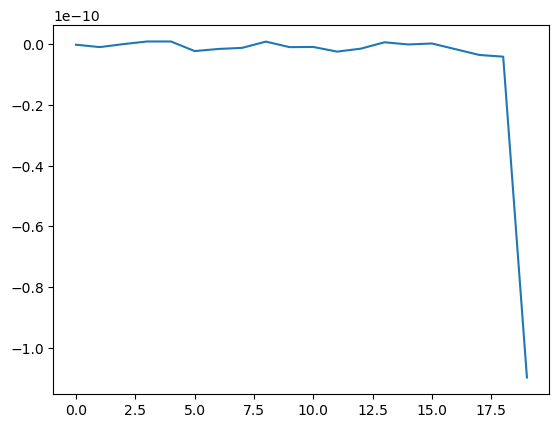

In [17]:
plt.plot(E[:eig]-theta[:eig])